In [14]:
#라이브러리 임포트 및 함수 정의
import cv2
import matplotlib.pyplot as plt
import numpy as np

#path를 입력받아 imread하고, BGR2RGB로 convert하는 함수
def MyImread(path):
    bgr_img = cv2.imread(path)
    assert bgr_img is not None, "영상 로드 실패"
    
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return rgb_img

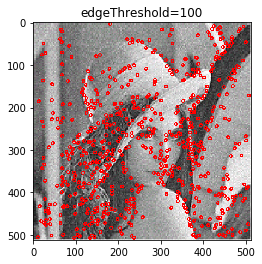

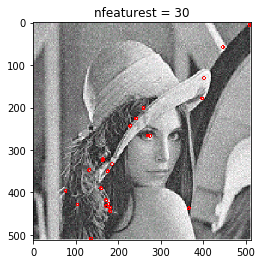

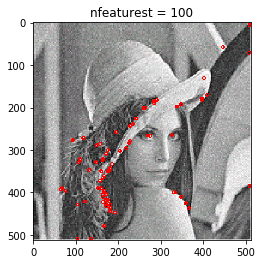

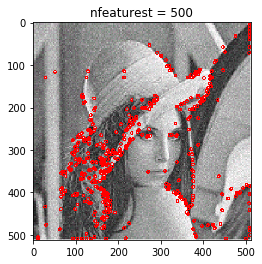

In [70]:
#SIFT

#영상(RGB)을 입력받아 특징점을 찾고,
#찾은 특징점을 그려 return하는 함수

#nfeatures : 점수가 높은 n개의 특징점을 리턴(-1이면 찾은 모든 특징점을 리턴)
#nOctaveLayers : 몇개의 옥타브를 사용할지 (스케일 공간에서)
#contrastThreshold : 약한 특징점을 제거하기 위한 threshold값(클수록 조금 검출됨)
#edgeThreshold : edge-like한 특징점을 제거하기 위한 threshold값(클수록 많이 검출됨)
#sigma : 첫 가우시안 블러의 sigma 값

def SIFT(img, nfeatures = 0, nOctaveLayers=3, contrastThreshold = 0.04, edgeThreshold=10, sigma=1.6, draw_rich=False):
    radian = 3 #특징점을 표시할 원의 반지름
    color = (255,0,0) #특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께(-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sift = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
    kp = sift.detect(gray_img, None)
    
    if draw_rich:
        cv2.drawKeypoints(result_img, kp, result_img, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    else :
        kp_xy = cv2.KeyPoint_convert(kp)
        for x,y in kp_xy:
            cv2.circle(result_img, (x,y), radian, color, thickness)
    return result_img

lena = MyImread("./lena(GausiaanNoise).bmp")

lena_sift1 = SIFT(lena, nfeatures = 0, nOctaveLayers=3, contrastThreshold = 0.04, edgeThreshold=100, sigma=3.0)
lena_sift2 = SIFT(lena, nfeatures = 30)
lena_sift3 = SIFT(lena, nfeatures = 100)
lena_sift4 = SIFT(lena, nfeatures = 500)

plt.figure()
plt.title("edgeThreshold=100")
plt.imshow(lena_sift1)

plt.figure()
plt.title("nfeaturest = 30")
plt.imshow(lena_sift2)

plt.figure()
plt.title("nfeaturest = 100")
plt.imshow(lena_sift3)

plt.figure()
plt.title("nfeaturest = 500")
plt.imshow(lena_sift4)

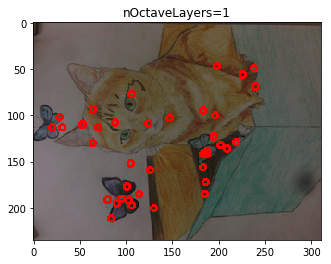

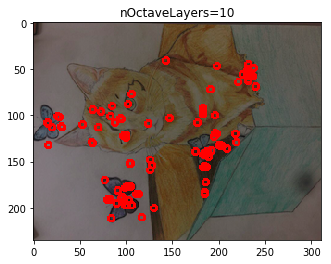

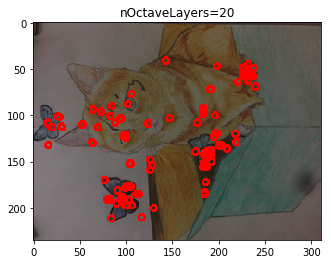

In [71]:
#SURF
#영상(RGB)을 입력받아 특징점을 찾고,
#찾은 특징점을 그려 return하는 함수

#hessianThreshold : 헤시안 행렬 검출에 사용될 threshold
#nOctaves : 몇 개의 옥타브를 사용할지
#nOctaveLayers : 한 옥타브에서 몇개의 레이어를 사용할지

def SURF(img, hessianThreshold=400, nOctaves=4, nOctaveLayers=3):
    radian = 3 #특징점을 표시할 원의 반지름
    color = (255, 0, 0) #특징점을 표시할 색상
    thickness = 2 #원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold, nOctaves, nOctaveLayers)
    kp = surf.detect(gray_img, None)
    
    kp_xy = cv2.KeyPoint_convert(kp)
    for x,y in kp_xy :
        cv2.circle(result_img, (x,y), radian, color, thickness)
    return result_img

lena = MyImread("./cat_change2.jpg")

lena_surf1 = SURF(lena, hessianThreshold = 400, nOctaveLayers=1)
lena_surf2 = SURF(lena, hessianThreshold = 400, nOctaveLayers=10)
lena_surf3 = SURF(lena, hessianThreshold = 400, nOctaveLayers=20)

plt.figure()
plt.title("nOctaveLayers=1")
plt.imshow(lena_surf1)

plt.figure()
plt.title("nOctaveLayers=10")
plt.imshow(lena_surf2)

plt.figure()
plt.title("nOctaveLayers=20")
plt.imshow(lena_surf3)

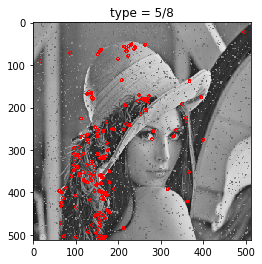

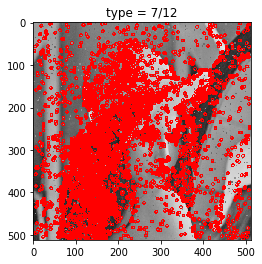

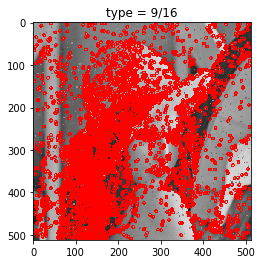

In [24]:
#FAST
#영상(RGB)을 입력받아 특징점을 찾고,
#찾은 특징점을 그려 return하는 함수

#type : 5/8, 7/12, 9/16 세가지가 존재

def FAST(img, type = cv2.FAST_FEATURE_DETECTOR_TYPE_5_8):
    radian = 3 # 특징점을 표시할 원의 반지름
    color = (255,0,0) #특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    surf = cv2.FastFeatureDetector_create(type=type, nonmaxSuppression=True)
    kp = surf.detect(gray_img, None)
    
    kp_xy = cv2.KeyPoint_convert(kp)
    for x,y in kp_xy :
        cv2.circle(result_img, (x,y), radian, color, thickness)
    return result_img

lena = MyImread("./lena-impulsenoise3.BMP")

lena_fast1 = FAST(lena, type = cv2.FAST_FEATURE_DETECTOR_TYPE_5_8)
lena_fast2 = FAST(lena, type = cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)
lena_fast3 = FAST(lena, type = cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)

plt.figure()
plt.title("type = 5/8")
plt.imshow(lena_fast1)

plt.figure()
plt.title("type = 7/12")
plt.imshow(lena_fast2)

plt.figure()
plt.title("type = 9/16")
plt.imshow(lena_fast3)

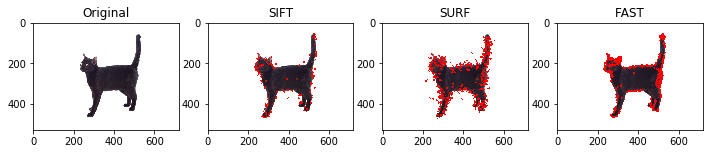

In [68]:
#SIFT, SURF, FAST 비교
def Compare(path):
    img = MyImread(path)
    img_sift = SIFT(img, contrastThreshold = 0.06) #img, nfeatures = 0, nOctaveLayers=3, contrastThreshold = 0.04, edgeThreshold=10, sigma=1.6, draw_rich=False
    img_surf = SURF(img, hessianThreshold = 90) #img, hessianThreshold=400, nOctaves=4, nOctaveLayers=3
    img_fast = FAST(img, type = cv2.FAST_FEATURE_DETECTOR_TYPE_7_12) #img, type = cv2.FAST_FEATURE_DETECTOR_TYPE_5_8
    
    
    plt.figure(figsize = (12,12))
    plt.subplot(1,4,1)
    plt.title("Original")
    plt.imshow(img)
    
    plt.subplot(1,4,2)
    plt.title("SIFT")
    plt.imshow(img_sift)
    
    plt.subplot(1,4,3)
    plt.title("SURF")
    plt.imshow(img_surf)
    
    plt.subplot(1,4,4)
    plt.title("FAST")
    plt.imshow(img_fast)
    
    
    
Compare("./blackcat.jpg")